# Problem Set 1[^1] {-}


[^1]: Problems 1 and 3 of this problem set were originally designed in collaboration with Dan Levy.

# Instructions {-}

1. Download the provided jupyter notebook file to your computer and any related data sets.
2. Write all your answers and code into this notebook file.
3. When your work is completed, __export your notebook to an HTML file__.
4. Submit your HTML file and a copy of the notebook to the assignment page on Moodle.

## Identification

### Your Information

Your Last Name: Latrofa

Your First Name: Ania


### Group Members (list any classmates you worked with on this problem set)

Saad, Anirudh

## Math Mode In Jupyter Notebooks

__Note__ Throughout the problem set, you may find it convenient (but by no means necessary) to typeset mathematical formulas. When working in a markdown cell, you can enter the in-line __math mode__ by wrapping an expression in the '\$' symbol. Click into this cell in the provided jupyter notebook to see some examples, all of which use the general LaTeX functionality for mathematical typesetting. You can read more about LaTeX functions [here](https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols). 

A simple formula can be written in-line. For example, writing ```$E = mc^2$``` will appear as $E = mc^2$, where the '\$' symbol does not appear and is instead used to delineate the beginning and end of a mathematical expression.

If you use the dollar-sign twice, that will separate out the expression as its own line, as in, ```$$E = mc^2$$``` which will produce:

$$E = mc^2$$

Latex is quite useful for subscripting as you can type an underscore `_` to add a subscript as in ```$x_i = 12$``` which produces:

$$x_i = 12$$

This syntax builds upon itself quite nicely when you need to add both subscripts and superscripts to more involved expressions (as in the below made-up formula):

$$\lambda_i^2 = \gamma_i + e^{\alpha_i^3}$$

If you need to write a longer expressions in subscripts or superscripts, you can wrap the whole expression to appear in a subscript or superscript in \{ \}. Below is a sample for the formula for the sample mean:

$$\bar{x} = \frac{1}{N}  \sum_{i=1}^{i=N} x_i$$

For this problem set, you may find yourself typing Bayes' Rule which can be written as:

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

Feel free to copy this formula syntax and update with the numbers for your specific calculation.

# Problem 1 - COVID-19 Testing

The goal of this question is to help you develop your ability to use statistics to understand COVID-19 testing. First a quick primer on COVID tests.[^2]

There are two types of tests: diagnostic tests and antibody tests. A __diagnostic test__ aims at detecting whether the person currently has an active coronavirus infection. There are two types of diagnostic tests which detect the virus – molecular tests, such as RT-PCR tests, that detect the virus’s genetic material, and antigen tests that detect specific proteins on the surface of the virus. 

An __antibody (serology) test__ aims at detecting whether the person had an infection, by assessing whether the person has developed antibodies against the virus. If test results show that the person has antibodies, it indicates that the person was likely infected with COVID-19 at some time in the past. It may also mean that the person has some immunity. But there is no definitive evidence on whether having antibodies means the person is protected against reinfection with COVID-19. The level of immunity and how long immunity lasts are not yet known.

[^2]: FDA and Mayo Clinic

We will start with antigen tests, which are diagnostic tests that are rapid to administer and get results. We will focus on one of the tests that has been approved by the FDA. This test has a specificity rate (percent not infected correctly identified as negative) of 100%. The sensitivity rate (percent of infected correctly identified as positive) is 97%.  Assume we are at an early stage of the pandemic such that the prevalence of COVID-19 in your population of interest is 1.2%.

## (a) Calculate the probability that a person who tests positive is infected i.e. $P(COVID|+)$. This number is usually referred to as the positive predictive value of the test.

Write your calculations here


In [24]:
p_covid = 0.012
specificity_rate = 1
sensitivity_rate = .97

$$P(COVID|+) = \frac{P(+|COVID) P(COVID)}{P(+)}$$

In [25]:
p_covid_positive = (sensitivity_rate * p_covid) / ((sensitivity_rate * p_covid))
print(f"P(COVID|+) = {p_covid_positive}")

P(COVID|+) = 1.0


## (b) Calculate the probability that a person who tests negative is not infected i.e. $P(NO COVID|-)$. This number is usually referred to as the negative predictive value of the test

Write your calculations here.


$$P(–|COVID) = 1 – sensitivityrate $$
$$P(NOCOVID) = 1 - P(COVID)$$

In [26]:
p_nocovid = 1 - p_covid
p_negative_given_nocovid = specificity_rate
p_negative_given_covid = 1 - sensitivity_rate

$$P(NOCOVID|–) = \frac{P(–|NOCOVID) P(NOCOVID)}{P(–)} = \frac{P(–|NOCOVID) P(NOCOVID)}{P(–|COVID) P(COVID) + P(–|NOCOVID) P(NOCOVID)}$$

In [27]:
p_nocovid_negative = (p_negative_given_nocovid * p_nocovid) / (
    (p_negative_given_nocovid * p_nocovid) + (p_negative_given_covid * p_covid)
)

print(f"P(no COVID | -) = {p_nocovid_negative}")

P(no COVID | -) = 0.9996357602493019


## (c) Is the result in (a) substantially different than the ones we got for mammograms in class? If so, explain why this is the case. If not, explain why not. [ 2-3 sentences]

Your answer here:
There is a difference in the specificity rate, in fact in the Mammograms' case it was around 6%, meaning there is a possibility of getting false positives. On the other hand, in the Covid-19 case there is no possibility that a positive test result is a false positive.

## (d)	The FDA indicates that for antigen tests “positive results are usually highly accurate but negative results may need to be confirmed with a molecular test.”

1. Do you agree with the FDA statement? Explain why or why not?
2. Suppose you are in charge of COVID testing in your city, and are trying to evaluate whether to use this antigen test for your citizens. Suppose you find it unacceptable for the probability of having COVID, conditional on a negative test, to be more than 5%. For what range of values of the COVID prevalence rate would you expect this conditional probability to be greater than 5%?

Your answer to (1) and (2) here:

1. I agree, because positive results are quite reliable, due to the fact that specificity is 100% and sensitivity is 97%. As we've seen, the probability of having covid after a positive test is 1 (no false positives) , hence positives are highly accurate. Furthermore, it is important to pay attention to negative results because they can be less trustworthy; confirming with a molecular test is important when caution is required.

In [28]:
p = [i / 100 for i in range(101)]

p_covid_given_negative = [
    (p_negative_given_covid * prev) /
    (p_negative_given_covid * prev + p_negative_given_nocovid * (1 - prev))
    for prev in p
]

threshold = 0.05 / (0.03 + 0.05 * 0.97)
print(threshold * 100, '%')

63.69426751592358 %


Now let’s explore antibody tests, which aim at detecting whether the person had the disease at some point in the past. We will focus our attention on the Wadsworth New York SARS-CoV Microsphere Immunoassay for Antibody Detection test, which is reported to have a sensitivity of 88% and a specificity of 98.8%.

In [29]:
ant_test_specificity = .88
ant_test_sensitivity = .988
ant_test_false_pos = 1 - .988
ant_test_false_neg = 1 - .88

## (e)	A random person in your country gets this test and has a positive result. Calculate the probability that this person had COVID-19 at some point in the recent past. To do this, explain:

1. How you got the prevalence rate for your country. Take your best guess of this number based on [data](https://ourworldindata.org/coronavirus) that you are able to find. Do not spend more than 10 minutes trying to estimate this number as the goal is to have you estimate this number even if having to confront the imperfections of data in the real world. 
2. What is the probability that this person had COVID-19 at some point in the recent past?

Please enter your answer here:

1. Italy: 451348 cases every 1 mln people. Estimate is that, in the around 59.44 million population, there have been roughly 26,828,125 cases in the country.
 $$ Prevalence = Population / (Total infections)$$

In [30]:
prevalence_ita = 26828125 / 59440000
p_never_had_covid = 1 - prevalence_ita
prevalence_ita

0.4513479979811575

In [31]:
ppv = (ant_test_sensitivity * prevalence_ita) / (ant_test_sensitivity * prevalence_ita + ant_test_false_pos * p_never_had_covid)
ppv

0.9854506157256818

## (f)	Draw a graph of the positive predictive value of the antibody test as a function of the prevalence of COVID-19. Describe the graph and discuss the implications for interpreting the results of antibody tests

Please insert your graph here. You can either render the plot in the notebook with a package like seaborn, matplotlib, or lets-plot.

Alternatively, you can save an image and load that with the IPython.display package. Example syntax for this package is below, where you would modify the `filename` argument to match the specific name and folder path of your image.

```python
from IPython.display import Image
Image(filename='your_plot.png') 
```

__Hint__: You could try to plot the entire function, or you could create a large number of points in the relevant region and evaluate the function at all those points. The numpy [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) may be useful in creating a set of evenly spaced points.

Please insert your graph here:

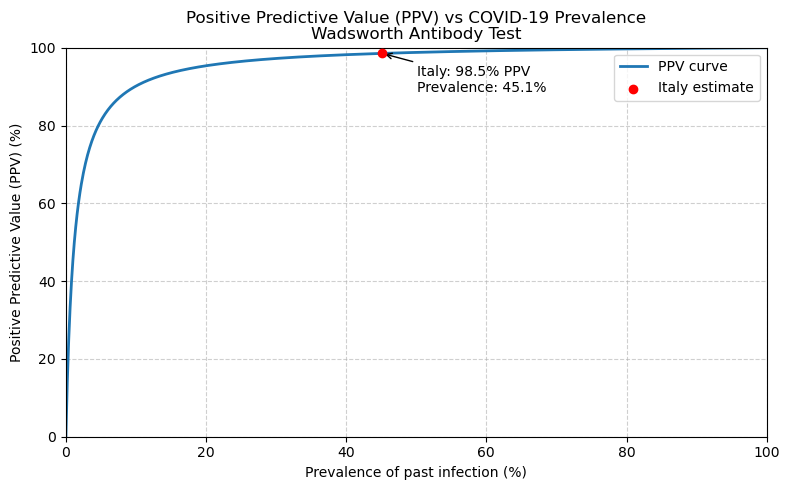

In [32]:
import matplotlib.pyplot as plt

ppv_ita = (ant_test_sensitivity * prevalence_ita) / (
    ant_test_sensitivity * prevalence_ita + ant_test_false_pos * p_never_had_covid
)

prevalences = [i / 1000 for i in range(0, 1001)]  # 0% to 100%
ppv_values = [
    (ant_test_sensitivity * p) / (ant_test_sensitivity * p + ant_test_false_pos * (1 - p))
    for p in prevalences
]

plt.figure(figsize=(8,5))
plt.plot([p * 100 for p in prevalences], [v * 100 for v in ppv_values], lw=2, label="PPV curve")
plt.scatter(prevalence_ita * 100, ppv_ita * 100, color="red", zorder=5, label="Italy estimate")

plt.annotate(
    f"Italy: {ppv_ita*100:.1f}% PPV\nPrevalence: {prevalence_ita*100:.1f}%",
    xy=(prevalence_ita*100, ppv_ita*100),
    xytext=(prevalence_ita*100 + 5, ppv_ita*100 - 10),
    arrowprops=dict(arrowstyle="->", lw=1)
)

plt.title("Positive Predictive Value (PPV) vs COVID-19 Prevalence\nWadsworth Antibody Test")
plt.xlabel("Prevalence of past infection (%)")
plt.ylabel("Positive Predictive Value (PPV) (%)")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Please describe your graph here:

The graph I developed shows how the PPV of the Wadsworth antibody test increases with the prevalence of past COVID-19 infection.
With lower prevalence, the PPV is low because false positive results dominate, hence a positive result does not necessarily mean true infection.
With increasing prevalence, the PPV increases sharply and approaches 100%, thus positive results become more reliable.

For Italy (with a 45% prevalence), the PPV is about 98.5%, meaning that a positive antibody test almost certainly indicates prior infection: antibody tests are most reliable in populations where many people have already been infected.

## (g)	Suppose a random member of the population tests positive on a first antibody test. She goes to take another antibody test with the same sensitivity and specificity as the one described above, and the result is also positive. What is the probability that the person has the disease after the second test? Assume the two tests are independent.

Write your calculations here (or insert a screenshot of your handwritten work).

In [33]:
p_covid_pos = (0.88*0.451)/(0.88*0.451+0.12*(1-.451))
p_covid_pos

0.8576367879678451

$$P(COVID|+) = \frac{P(+|COVID) P(COVID)}{P(+|COVID)P(COVID) + P(-|NOCOVID)P(NOCOVID)} = 0.858$$

In [34]:
p_covid_postwice = (.88*p_covid_pos)/(.88*p_covid_pos+.12*(1-p_covid_pos))
p_covid_postwice

0.9778653824616419

$$P(COVID|++) = \frac{P(++|COVID) P(COVID|+)}{P(++|COVID)P(COVID|+) + P(++|NOCOVID)P(NOCOVID|+)} = 0.944$$

# Problem 2 - Mexican Pensions for the Poor

Read the case study "Providing Pensions for the Poor: Targeting Cash Transfers for the Elderly in Mexico." This case study is available in Week 2 of the reading list available on the Moodle site or can be accessed from the Week 2 section of the course Moodle page. After reading the case study, answer the following questions which we will talk about in more detail in class next week.

## (a) Calculate the leakage and undercoverage rates for each of the three options. Show your calculations and report the final results by editing the below table

Write your calculations

In [37]:
total_elderly = 4592726
total_poor = 1872313
total_non_poor = total_elderly - total_poor

In [38]:
receive_option1 = total_elderly * 0.1871
poor_receive_option1 = total_poor * 0.3407

leakage_opor = ((receive_option1 - poor_receive_option1) / receive_option1) * 100
undercoverage_opor = ((total_poor - poor_receive_option1) / total_poor) * 100

print(f"Option 1 - Leakage: {leakage_opor:.2f}%, Undercoverage: {undercoverage_opor:.2f}%")

Option 1 - Leakage: 25.77%, Undercoverage: 65.93%


In [39]:
receive_option2 = total_elderly * 0.3077
poor_receive_option2 = total_poor * 0.4281

leakage_option2 = ((receive_option2 - poor_receive_option2) / receive_option2) * 100
undercoverage_option2 = ((total_poor - poor_receive_option2) / total_poor) * 100

print(f"Option 2 - Leakage: {leakage_option2:.2f}%, Undercoverage: {undercoverage_option2:.2f}%")

Option 2 - Leakage: 43.28%, Undercoverage: 57.19%


In [40]:
receive_option3 = total_elderly * 0.6621
poor_receive_option3 = total_poor * 0.5597

leakage_option3 = ((receive_option3 - poor_receive_option3) / receive_option3) * 100
undercoverage_option3 = ((total_poor - poor_receive_option3) / total_poor) * 100

print(f"Option 3 - Leakage: {leakage_option3:.2f}%, Undercoverage: {undercoverage_option3:.2f}%")

Option 3 - Leakage: 65.54%, Undercoverage: 44.03%


## (b)	Assess the advantages and disadvantages of each of the options. In doing so, consider the targeting effectiveness as well as other criteria (including political, logistical, and financial). Summarize your findings. Be sure to include a discussion of the advantages and disadvantages for each option.

Your summary here:

OPTION 1 - Oportunidades Household
Advantages: lowest leakage (efficient in economic terms), and  it is simple to verify people's eligibility;
Disadvantages: hightest undercoverage (meaning that it misses many poors), exclusion of those not in the Oportunidades program.

OPTION 2 - Small Locality (≤ 2,500)
Advantages: moderate (not the highest) undercoverage, easy to implement, politically appealing for rural communities;
Disadvantages: quite high leakage, systematically excludes all urban poor, geographic location is an imperfect proxy for poverty.

OPTION 3 - High Marginality Index
Advantages: lowest undercoverage (reaches most poor elderly), covers both urban and rural poor, most equitable distribution;
Disadvantages: highest leakage (not cost-efficient), need for updated marginality indices, highest total program cost due to broader coverage.

## (c)	Write one crisp paragraph to the Secretary of Social Development (Sedesol) recommending which option should be selected to target the pension program and why. Justify your recommendation using the advantages and disadvantages you identified above. The paragraph should be written in a language that the head of Sedesol (who you can assume is intelligent and well-educated, but not well-versed in statistics) can understand.

Write your paragraph to the Secretary of Social Development here:

For the Pensions Program, I recommend implementing Option 3 (High or Very HIgh Marginality Index), as it best fulfills the fundamental goal of poverty alleviation by reaching 56% of poor elderly, which is a significantly higher amount than the other options that miss the majority of those in need. While this option does direct some resources to non-poor individuals and requires more administrative effort to implement, these drawbacks are outweighed by its coverage and equity (in the hypothetical case that there is not a strict budget-constraint), it is the only option that reaches poor elderly in both urban and rural areas.
Option 1, even if cost-efficient, leaves nearly two-thirds of poor elderly without support, which undermines the program's social mission, and Option 2 neglects urban poverty in its entirety.


## (d) Based on your assessment above, which of the three options would you recommend to the Secretary of Sedesol? Enter your answer [here](https://moodle.lse.ac.uk/mod/questionnaire/view.php?id=1809551)

Enter your answers in the above link. Once completed, type 'Done' into this field:

Done

# Problem 3 - Learning About the World Economy

The purpose of this question is to help you learn about the world economy while practicing the python skills introduced in the pre-sessional. This will be the first of several problem sets in which you will be developing these skills.

The dataset for this question is an extract from World Bank’s World Development Indicators (WDI).  Please download the workbook “WDI Data Extract" from the course webpage. There is another file which contains information about the variables.

First, familiarize yourself with the “WDI Data Extract” data file. Then import these data into python and answer the questions below. We will focus a lot of attention on the gross domestic product (GDP), a concept you will deal with more in your macroeconomics course. Note that the WDI dataset reports GDP values in 2010 U.S. dollars, so that so you can directly compare values in different years.  Also note that GDP and population data are not available in some of the years in the spreadsheet. For this problem set, use only those observations for which data are available. (A question dealing with missing data appears further below). 


## (a) Explore the data set

Before doing any data analysis, you should get a sense of the data set itself. Some questions you should answer are:

1. What is the unit of observation (country, year, country-year)?
2. How many observations are in the data set?
3. What are the key variables?
4. For the key variables, how are they coded and what is the extent of missing data?

Explore these questions on your own (but there is no need to type up answers to them individually). After this exploratory analysis, create a new analysis data set where you:

* Transform the population variables to be expressed in millions of people
* Transform the gdp variables so they are expressed in millions of dollars
* Keep only observations that have non-missing data for both population 2019 and gdp 2019

This will be the data set you use for the remainder of this problem set.

In [264]:
import pandas as pd

wdi_df = pd.read_csv ('/Users/anialatrofa/Desktop/London School of Economics/Study Material/PP422/Python/Data/WDI Data Extract.csv')

In [265]:
wdi_df.head(20)

,country,code,region,income_group,gdp_1993,pop_1993,gdp_2019,pop_2019
0,Afghanistan,AFG,South Asia,Low income,NaN,15816603.0,2.180886e+10,38041754.0
1,Albania,ALB,Europe & Central Asia,Upper middle income,4.424049e+09,3227287.0,1.487230e+10,2854191.0
2,Algeria,DZA,Middle East & North Africa,Upper middle income,9.057761e+10,27635515.0,2.020000e+11,43053054.0
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,NaN,51020.0,NaN,55312.0
4,Andorra,AND,Europe & Central Asia,High income,1.977109e+09,60971.0,3.539838e+09,77142.0
5,Angola,AGO,Sub-Saharan Africa,Lower middle income,2.310394e+10,13075049.0,9.901351e+10,31825295.0
6,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,7.539491e+08,65777.0,1.525167e+09,97118.0
7,Argentina,ARG,Latin America & Caribbean,Upper middle income,2.600000e+11,33970111.0,4.380000e+11,44938712.0
8,Armenia,ARM,Europe & Central Asia,Upper middle income,2.977080e+09,3363108.0,1.399619e+10,2957731.0
9,Aruba,ABW,Latin America & Caribbean,High income,1.933189e+09,72504.0,NaN,106314.0


In [266]:
wdi_df.columns

Index(['country', 'code', 'region', 'income_group', 'gdp_1993', 'pop_1993',
       'gdp_2019', 'pop_2019'],
      dtype='object')

In [267]:
wdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       217 non-null    object 
 1   code          217 non-null    object 
 2   region        217 non-null    object 
 3   income_group  217 non-null    object 
 4   gdp_1993      177 non-null    float64
 5   pop_1993      216 non-null    float64
 6   gdp_2019      185 non-null    float64
 7   pop_2019      216 non-null    float64
dtypes: float64(4), object(4)
memory usage: 13.7+ KB


In [268]:
wdi_df_copy = wdi_df.copy()

pop_cols = [col for col in wdi_df_copy.columns if 'pop' in col.lower()]
for col in pop_cols:
    wdi_df_copy[col] = wdi_df_copy[col] / 1_000_000

gdp_cols = [col for col in wdi_df_copy.columns if 'gdp' in col.lower()]
for col in gdp_cols:
    wdi_df_copy[col] = wdi_df_copy[col] / 1_000_000

wdi_df_copy = wdi_df_copy.dropna(subset=['pop_2019', 'gdp_2019'])

print(f"Original observations: {len(wdi_df)}")
print(f"Analysis dataset observations: {len(wdi_df_copy)}")
print(f"Observations dropped: {len(wdi_df) - len(wdi_df_copy)}")

wdi_df_copy.to_csv('wdi_df_copy.csv', index=False)

Original observations: 217
Analysis dataset observations: 185
Observations dropped: 32


Report the mean and the number of observations for gdp 2019 in your analysis data set.

In [269]:
# Loading packages
import numpy as np
import pandas as pd

# You can read in our data with the following code, adjusting your file path
# wdi = pd.read_csv('...')

In [270]:
# Your code and results here:
mean_gdp = wdi_df_copy['gdp_2019'].mean()

n_obs = wdi_df_copy['gdp_2019'].count()

print(f"Mean GDP 2019: {mean_gdp:.2f} million dollars")
print(f"Number of observations: {n_obs}")

Mean GDP 2019: 450988.62 million dollars
Number of observations: 185


## (b) Totals - Please calculate and report:

1. The total World GDP (expressed in trillions of 2010 dollars) and world population in 2019 (expressed in billions of people)
2. Top 5 countries in terms of GDP in 2019 and their respective GDPs and top 5 countries in terms of population in 2019 and their respective populations (round your values).

In [ ]:
# Your code and results here
world_gdp = wdi_df_copy['gdp_2019'].sum() / 1_000
world_pop = wdi_df_copy['pop_2019'].sum()

print("Top 5 Countries by GDP 2019")
top5_gdp = wdi_df_copy.nlargest(5, 'gdp_2019')[['country', 'gdp_2019']].copy()
top5_gdp['gdp_2019'] = top5_gdp['gdp_2019']
print(top5_gdp.to_string(index=False))
print()

# Top 5 countries by Population
print('Top 5 Countries by Population 2019')
top5_pop = wdi_df_copy.nlargest(5, 'pop_2019')[['country', 'pop_2019']].copy()
top5_pop['pop_2019'] = top5_pop['pop_2019']
print(top5_pop.to_string(index=False))

Top 5 Countries by GDP 2019
      country   gdp_2019
United States 18300000.0
        China 11500000.0
        Japan  6210000.0
      Germany  3940000.0
       France  2970000.0

Top 5 Countries by Population 2019
      country    pop_2019
        China 1397.715000
        India 1366.417754
United States  328.239523
    Indonesia  270.625568
     Pakistan  216.565318


## (c) Central Tendencies:

Calculate GDP per capita (total GDP divided over population, ensuring the units are the same) for each country in the data set for 1993 and 2019. Then report the following statistics (feel free to answer each question with a separate code block):

1. GDP per capita for the average country in 2019 (take a simple average of the values across countries in 2019)
2. World GDP per capita in 2019 (equal to total world GDP divided by total world population)
3. Explain the difference between questions (1) and (2) above in language a person not well-versed in statistics can understand
4. What do you think drives the difference between (1) and (2)
5. The total population of all countries in 2019 with GDP per capita below the world mean calculated from part (1)
6. What is your answer to (5) telling you in terms of how appropriate mean world GDP per capita is in characterizing the well being of an average person in the world?

__Hint__: For question 5, you may find it useful to save the average GDP per capita from part (1) as a variable you can call in a later filter.

In [186]:
# Your code blocks here, feel free to use multiple cells

In [187]:
# GDP per capita in 1993 and 2019
wdi_df_copy['gdp_per_capita_1993'] = wdi_df_copy['gdp_1993'] / wdi_df_copy['pop_2019']
wdi_df_copy['gdp_per_capita_2019'] = wdi_df_copy['gdp_2019'] / wdi_df_copy['pop_2019']

print("GDP per capita in 1993 and 2019")
print(wdi_df_copy[['country', 'gdp_per_capita_1993', 'gdp_per_capita_2019']])

GDP per capita in 1993 and 2019
                country  gdp_per_capita_1993  gdp_per_capita_2019
0           Afghanistan                  NaN           573.287551
1               Albania          1550.018607          5210.688290
2               Algeria          2103.860275          4691.885505
4               Andorra         25629.481476         45887.302131
5                Angola           725.961624          3111.157699
..                  ...                  ...                  ...
211             Vietnam           379.952307          2083.719798
213  West Bank and Gaza                  NaN          2939.329777
214         Yemen, Rep.           481.013325           631.487877
215              Zambia           492.702335          1653.829400
216            Zimbabwe           958.526157          1183.098823

[185 rows x 3 columns]


In [188]:
# 1. Average GDP per capita in 2019
wdi_df_copy['gdp_per_capita_2019'].mean()

np.float64(15011.234055452305)

In [189]:
# 2. World GDP per capita in 2019
total_world_gdp = wdi_df_copy['gdp_2019'].sum()
total_world_pop = wdi_df_copy['pop_2019'].sum()
total_world_gdp / total_world_pop

np.float64(11082.340651667022)

3. Difference between (1) and (2): based on how the average is calculated, because in question 1 each country is treated equally (not accounting for the differences in population size); on the other hand, question 2 calculates the experience related to each and every person in the world, summing all the world GDP and dividing by world population (hence, countries with more people will have more weight).

4. The difference in the results is driven by population size and wealth inequality between countries. Large countries might have lower GDP per capita than many smaller and wealthier countries.
In question 1, small wealthy countries pull the average up because they count equally with large poor countries. In question 2, the large populations of certain countries have more weight, pulling the world average towards their GDP per capita levels.

## (d) Missing data

This question asks you to consider the potential effects of missing data on your analysis. Returning to the complete data set you started with, answer the following questions:

1. For how many countries does the database not have a 1993 GDP figure?
2. Calculate the mean GDP per capita in 1993 ignoring missing values
3. Divide the countries into two groups: those that have missing GDP per capita data in 1993 and those that do not. Calculate the mean GDP per capita in 2019 for these two groups
4. Which countries seem more likely to have missing data in 1993? You may consider doing additional analysis using the `region` and `income_group` variables provided in the data set.

In [190]:
# Your code blocks here, feel free to use multiple cells

In [191]:
# 1. Missing GDP for 1993
missing_gdp_1993 = wdi_df['gdp_1993'].isnull().sum()
print(f"Number of countries without GDP data for 1993: {missing_gdp_1993}")

Number of countries without GDP data for 1993: 40


In [192]:
# 2. GDP per capita in 1993 (ignoring missing values)
wdi_df['gdp_per_capita_1993'] = wdi_df['gdp_1993'] / wdi_df['pop_1993']

mean_gdp_pc_1993 = wdi_df['gdp_per_capita_1993'].mean()
print(f"Mean GDP per capita in 1993: ${mean_gdp_pc_1993:,.2f}")

Mean GDP per capita in 1993: $10,724.49


In [193]:
# 3. Mean GDP per capita for two groups
wdi_df['gdp_per_capita_2019'] = wdi_df['gdp_2019'] / wdi_df['pop_2019']

wdi_df['missing_1993'] = wdi_df['gdp_per_capita_1993'].isnull()

print("Mean GDP per capita in 2019 by 1993 data availability")
print(wdi_df.groupby('missing_1993')['gdp_per_capita_2019'].mean())

available_data = wdi_df[wdi_df['missing_1993'] == False]['gdp_per_capita_2019'].mean()
unavailable_data = wdi_df[wdi_df['missing_1993'] == True]['gdp_per_capita_2019'].mean()

print(f"\nCountries with 1993 data: ${available_data:}")
print(f"Countries without 1993 data: ${unavailable_data:}")
print(f"Difference: ${available_data - unavailable_data:}")

Mean GDP per capita in 2019 by 1993 data availability
missing_1993
False    15396.206835
True     11647.787665
Name: gdp_per_capita_2019, dtype: float64

Countries with 1993 data: $15396.20683510261
Countries without 1993 data: $11647.787664823316
Difference: $3748.419170279294


In [ ]:
# 4. Countries more likely to have missing data
print("Missing 1993 GDP Data by Region")
region_missing = wdi_df.groupby('region')['missing_1993'].agg(['sum', 'mean'])
region_missing['mean'] = (region_missing['mean'])
print(region_missing.sort_values('mean', ascending=False))

print("\n Missing 1993 GDP Data by Income Group")
income_missing = wdi_df.groupby('income_group')['missing_1993'].agg(['sum', 'mean'])
income_missing['mean'] = (income_missing['mean'])
print(income_missing.sort_values('mean', ascending=False))

Missing 1993 GDP Data by Region
                            sum       mean
region                                    
Middle East & North Africa    6  28.571429
South Asia                    2  25.000000
East Asia & Pacific           9  24.324324
Europe & Central Asia        13  22.413793
Latin America & Caribbean     7  16.666667
Sub-Saharan Africa            4   8.333333
North America                 0   0.000000

 Missing 1993 GDP Data by Income Group
                     sum       mean
income_group                       
High income           22  27.848101
Low income             6  19.354839
Upper middle income    8  13.333333
Lower middle income    5  10.638298


## (e) Putting it all together

In one crisp paragraph, summarize your findings from your analysis in the earlier parts of this problem.

In summary, the findings of Exercise 3 from the WDI Data Extract give us relevant info on global economic inequality and on how relevant is the way it is measured. Starting from how the average GDP is measured, which can differ a lot whether we account for population size or not, and showing that there may be a link between population size and wealth.
Missing data also highlights the fact that there might be systematic biases: countries lacking 1993 GDP data tend to be poorer in 2019 and are disproportionately concentrated in certain regions and lower income groups, suggesting these were likely transitioning economies or newly independent states in the beginning of the '90s. This pattern means that any historical analysis excluding these countries would overestimate global prosperity, as it would systematically omit poorer nations and under-represent the true extent of global inequality.

# Problem 4 - Your Engagement Contract

Please review the instructions for completing your engagement plan for PP422 available [here](https://moodle.lse.ac.uk/mod/assign/view.php?id=1809542). After completing your participation plan, you may upload it at the same location.

Submit your plan at the provided link. Once completed, type 'Done' into this field

__Write 'Done' here:__
Done

In [ ]:
PS/W2 PP422 Problem Set 2.ipynb